3.1 决策树的构造

In [80]:
from importlib import reload
from importlib import reload
import importlib
import trees
from math import log

def calcShannonEnt(dataSet):
#     保存实例总数
    numEntries = len(dataSet)
#     创建一个数据字典
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
#         每个键值都记录了当前类别出现的次数
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel]+=1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob*log(prob,2)
    return shannonEnt

In [81]:
from importlib import reload
def createDataSet():
    dataSet = [[1,1,'yes'], 
               [1,1,'yes'],
               [1,0,'no'],
               [0,1,'no'],
               [0,1,'no']]
    labels = ['no surfacing','flippers']
    return dataSet,labels


In [82]:
from importlib import reload
import importlib
import trees
importlib.reload(trees)
myDat,labels = createDataSet()


In [40]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [84]:
calcShannonEnt(myDat)

0.9709505944546686

In [85]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [86]:
myDat[0][-1] ='maybe'

In [87]:
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [89]:
calcShannonEnt(myDat)

1.3709505944546687

程序清单3-2 按照给定特征划分数据集

In [90]:
# 使用了3个参数：待划分的数据集、划分数据集的特征、需要返回的特征的值

def splitDataSet(dataSet,axis,value):
    retDataSet = []
#     数据集这个列表中的各个元素也是列表，一旦发现符合要求的值，则将其添加到新创建的列表中。
#     在if语句中，程序将符合特征的数据抽取出来
    for featVec in dataSet:
        if featVec[axis]== value:
            reducedFeatvec = featVec[:axis]
            reducedFeatvec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatvec)
    return retDataSet

In [91]:
# 代码中使用了python的自带extend() 和append()方法。这两个方法的处理结果完全不同。
a = [1,2,3]
b = [4,5,6]
a.append(b)
a



[1, 2, 3, [4, 5, 6]]

In [92]:

a = [1,2,3]
b = [4,5,6]
a.extend(b)
a

[1, 2, 3, 4, 5, 6]

In [93]:
splitDataSet(myDat,0,1)

[[1, 'maybe'], [1, 'yes'], [0, 'no']]


程序清单3-3选择最好的数据集划分方式

In [94]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0])-1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
#     创建唯一的分类标签列表
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
#         计算每种划分方式的信息熵
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet,i,value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob* calcShannonEnt(subDataSet)
        infoGain = baseEntropy -newEntropy
#        计算最好的信息增益
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [95]:
myDat ,labels = createDataSet()

In [96]:
chooseBestFeatureToSplit(myDat)

0

In [97]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [262]:
def majorityCnt(classList):
    classCount = {}
#     字典对象存储了classList中每个类标签出现的频率，最后利用operator操作键值排序字典，并返回出现次数最多的分类名称
    if vote not in classCount.keys():
        classCount[vote] = 0
        classCount[vote]+=1
    sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1),reverse = True)
    return sortedClassCount[0][0]

程序清单3-4 创建树的函数代码

In [263]:
# 程序清单3-4的代码使用两个输入参数：数据集和标签列表
def createTree(dataSet,labels):
#     递归函数的第一个停止条件是所有的类标签完全相同。则直接返回该类标签。
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) ==len(classList):
        return classList[0]
#     递归函数的第二个停止条件是使用完了所有的特征，仍然不能将数据集划分成近包含唯一类别的分组，
# 由于第二个条件无法简单地返回唯一的类标签，这里使用前面介绍的majorityCnt函数挑选出次数最多的类别作为返回值。
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
#     字典变量mytree存储了树的所有信息，这对于其后绘制树形图非常重要。当前数据集选取的最好的特征存储在变量bestFeat中，
# 得到列表包含的所有属性值3。
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
#     最后代码遍历当前选择特征包含的所有属性值，在每个数据集划分上递归调用函数createTree（），得到的返回值将被插入到变量myTree中
    for value in uniqueVals:
#         这行代码复制了类标签，并将其存储在新列表变量subLabels中。之所以这样做，是因为在Python语言中函数参数是列表类型时，
#         参数是按照引用的方式传递的，为了保证每次调用函数createTree（）时不改变原始列表的内容，使用新变量subLabels代替原始列表。
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet,bestFeat,value),subLabels)
    return myTree

In [264]:
myDat,lables = createDataSet()
myTree = createTree(myDat,labels)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [265]:
import matplotlib.pyplot as plt

# 定义描述树节点的常量，定义了文本框和箭头格式
decisionNode = dict(boxstyle = "sawtooth",fc = "0.8")
leafNode = dict(boxstyle="round4",fc = "0.8")
arrow_args = dict(arrowstyle="<-")

# 定义plotNode（）函数执行了实际的绘图功能，该函数需要一个绘图区，该区域由全局变量createPlot.ax1定义。
def plotNode(nodeText,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeText, xy = parentPt, xycoords = 'axes fraction',xytext = centerPt,textcoords="axes fraction",va = "center",ha = "center",bbox = nodeType,arrowprops = arrow_args)
# 定义createPlot（）函数，是这段代码的核心。
# 首先创建了一个新图形并清空绘图区，然后在绘图区上绘制两个代表不同类型的树节点，后面我们将用这两个节点绘制树形图。

def createPlot():
    fig = plt.figure(1,facecolor = 'white')
    fig.clf()
    plt.rcParams['font.sans-serif']=['SimHei']
    createPlot.ax1 = plt.subplot(111,frameon = False)
    plotNode('决策节点',(0.5, 0.1),(0.1,0.5),decisionNode)
    plotNode('叶节点' ,(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()
    

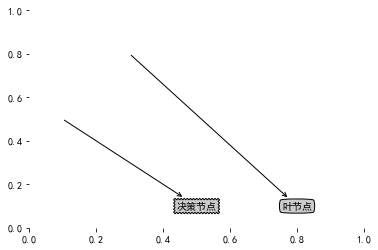

In [266]:

createPlot()


程序清单3-6 获取叶节点的数目和树的层数


In [267]:
def getNumLeafs(myTree):
    numLeafs = 0
#     第一个关键字是第一次划分数据集的类别标签，附带的数值表示子节点的取值。
    firstStr =list(myTree.keys())[0]
    secondDict = myTree[firstStr]
#     从第一个关键字出发，我们可以遍历整棵树的所有子节点。使用python提供的type（） 函数而已判断子节点是否为字典型
#    如果子节点是字典类型，则该节点也是一个判断节点。需要递归调用getNumLeafs（）函数。getNumleafs（）函数遍历整棵树，
# 累计叶子节点个数，并返回该数值。
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs+=getNumLeafs(secondDict[key])
        else:
            numLeafs+=1
    return numLeafs


# 第2个函数getTresDepth（）计算遍历过程中遇到判断节点的个数。该函数的终止条件是叶子节点，一旦到达叶子节点，
# 则从递归调用中返回，并将计算树深度的变量加一。

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1 +getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

In [268]:
# 为了节省大家时间，函数retrieveTree 输出预先存储的树信息，避免了每次测试代码时都要从数据中创建树的麻烦

def  retrieveTree(i):
    listOfTrees = [{'no surfacing':{0:'no',1:{'flippers':{0:'no',1:'yes'}}}},{'no surfacing':{0:'no',1:{'flippers':{0:{'head':{0:'no',1:'yes'}},1:'no'}}}}]
    return listOfTrees[i]


#函数retrieve（） 主要用于测试，返回预定义的树结构。上述命令中调用getNumLeafs（）函数返回值为3，
# 等于树0的叶子节点数；调用getTreeDepths（）函数也能够正确返回数的层数



In [269]:
retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [270]:
myTree = retrieveTree(0)

In [271]:
getNumLeafs(myTree)

3

In [272]:
getTreeDepth(myTree)

2

In [273]:
# 函数retrieve Tree()主要用于测试，返回预定义的树结构。上述命令中调用getNumleafs() 函数返回值为3，等于树0的叶子节点数，
# 调用getTreeDeepths（）函数也能够正确返回树的层数



In [274]:
def plotMidText(cntrPt,parentPt,txtString):
#     在父子节点间填充文本信息
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree,parentPt,nodeTxt):
#     计算宽与高
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    

    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    
#     标记子节点属性
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
#     减少y偏移
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff = plotTree.xOff+1.0/plotTree.totalW
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))
    plotTree.yOff =plotTree.yOff+1.0/plotTree.totalD

def createPlot(inTree):
    fig = plt.figure(1,facecolor = 'white')
    fig.clf()
    axprops = dict(xticks = [],yticks = [])
    createPlot.ax1 = plt.subplot(111,frameon = False,**axprops)
    #     全局变量plotTree.totalW储存树的宽度
    plotTree.totalW = float(getNumLeafs(inTree))
    #     全局变量plotTree.totalD储存树的深度
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW;plotTree.yOff = 1.0;
    plotTree(inTree,(0.5,1.0),'')
    plt.show()
    

In [275]:
myTree = retrieveTree(0)


In [276]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

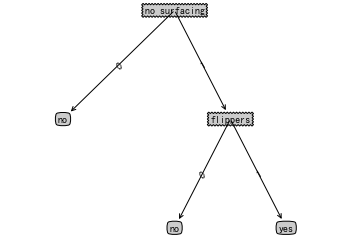

In [277]:
createPlot(myTree)

In [278]:
myTree['no surfacing'][3]='maybe'

In [279]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

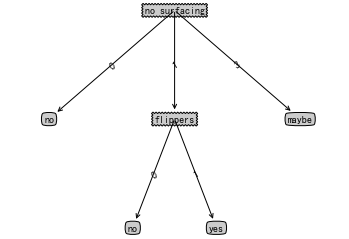

In [280]:
createPlot(myTree)

3-8 使用决策树的分类函数


In [281]:
from importlib import reload
import importlib
import trees
importlib.reload(trees)

def classify(inputTree,featLabels,testVec):
    
    firstStr = (list(inputTree.keys()))[0]
    secondDict = inputTree[firstStr]
    #     使用index方法查找当前列表中第一个匹配firstStr变量的元素
    featIndex = featLabels.index(firstStr)
#     递归遍历整棵树，比较testVec变量中的值与树节点的值。如果到达叶子节点，则返回当前节点的分类标签
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ =='dict':
                classLabel = classify(secondDict[key],featLabels,testVec)
            else: classLabel = secondDict[key]
    return classLabel

    

In [282]:

myDat,labels = createDataSet()
labels

['no surfacing', 'flippers']

In [283]:
myTree = retrieveTree(0)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [284]:
classify(myTree,labels,[1,0])

'no'

In [285]:
classify(myTree,labels,[1,1])

'yes'


程序清单3-9使用pickle 模块存储决策树


In [286]:
def storeTree(inputTree,filename):
    import pickle
    fw = open(filename,'wb+') 
    pickle.dump(inputTree,fw)
    fw.close()
    
def grabTree(filename):
    import pickle
    fr = open(filename,'rb')
    return pickle.load(fr)

In [287]:
storeTree(myTree,'classifierStorage.txt')

In [288]:
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [289]:
fr = open('lenses.txt')

In [290]:
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age','prescript','astigmatic','tearRate']
lensesTree = createTree(lenses,lensesLabels)
lensesTree

{'tearRate': {'reduced': 'no lenses',
  'normal': {'astigmatic': {'yes': {'prescript': {'hyper': {'age': {'presbyopic': 'no lenses',
        'pre': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}},
    'no': {'age': {'presbyopic': {'prescript': {'hyper': 'soft',
        'myope': 'no lenses'}},
      'pre': 'soft',
      'young': 'soft'}}}}}}

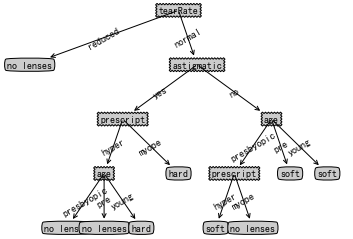

In [291]:
createPlot(lensesTree)